# Plotting plays

In [1]:
import os

In [2]:
directions_path = ".." + os.sep + "directions"
csv_path = "." + os.sep + "csv"
corpus_path = ".." + os.sep + "RusDraCor"

## Loading play data

In [3]:
import pandas as pd
import numpy as np

I'll create separate columns — `Surname` and `Short title` — to fit everything on figures.

In [4]:
def surname(full_name):
    return full_name.split(",")[0]

def short_title(title):
    words = title.split()
    short = " ".join(words[:2]) + "…"
    return short

In [5]:
play_df = pd.read_csv(csv_path + os.sep + "joint_data.csv", sep=";", encoding="utf-8")

# columns creation
play_df["Surname"] = play_df["Author"].apply(surname)
play_df["Short title"] = play_df["Title"]

play_df.head()

,Acts,Author,Directions,Lemmas,"Lemmas, per direction",Title,Words,"Words, per direction",Year,"Directions, per act","Words, per act","Lemmas, per act",ADJ,ADVB,INTJ,NOUN,PREP,VERB,Surname,Short title
0,1,"Блок, Александр Александрович",38,910,22.263158,Балаганчик,2240,22.736842,1906,38.000000,2240.000000,910.000000,3.289474,1.315789,0.000000,7.815789,3.315789,3.368421,Блок,Балаганчик
1,3,"Блок, Александр Александрович",133,1475,14.631579,Король на площади,5535,12.466165,1907,44.333333,1845.000000,491.666667,1.421053,0.872180,0.045113,4.428571,1.684211,2.090226,Блок,Король на площади
2,1,"Блок, Александр Александрович",80,1342,18.025000,Незнакомка,4222,16.462500,1907,80.000000,4222.000000,1342.000000,2.462500,0.950000,0.000000,5.450000,2.125000,2.837500,Блок,Незнакомка
3,4,"Булгаков, Михаил Афанасьевич",372,2901,5.634409,Дни Турбиных,16426,3.739247,1926,93.000000,4106.500000,725.250000,0.416667,0.131720,0.018817,1.478495,0.540323,0.833333,Булгаков,Дни Турбиных
4,3,"Булгаков, Михаил Афанасьевич",319,2195,6.507837,Иван Васильевич,10303,4.721003,1936,106.333333,3434.333333,731.666667,0.391850,0.156740,0.006270,2.015674,0.689655,1.068966,Булгаков,Иван Васильевич


## Plots

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### Subfunctions

#### Plotting

I'll make a separate function to plot everything so I won't have to copy and paste:

In [7]:
def plot_features(x_col, y_col, axis):
    # data
    x = pd.to_numeric(x_col)
    y = pd.to_numeric(y_col)
    
    # plot
    plt.figure(figsize=(18,8))
    plt.title(axis["title"], fontsize=20)
    plt.xlabel(axis["x"], fontsize=16)
    plt.ylabel(axis["y"], fontsize=16)
    plt.xticks(rotation=90)
    plt.plot(x, y, ".")
    
    # linear regression to show the trend
    m, b = np.polyfit(x, y, 1)
    y_reg = m*x + b
    plt.plot(x, y_reg, "-")
    plt.savefig("./figures/{}.png".format(axis["file_name"]))
    plt.show()

#### Regression

I'll use that to show the trend and compare these trends between different POS.

In [8]:
def regression(x_col, y_col):
    x = pd.to_numeric(x_col)
    y = pd.to_numeric(y_col)
    m, b = np.polyfit(x, y, 1)
    return m, b

### Distributions

#### By author

In [9]:
authors = play_df["Surname"].value_counts()
authors = authors.sort_index()

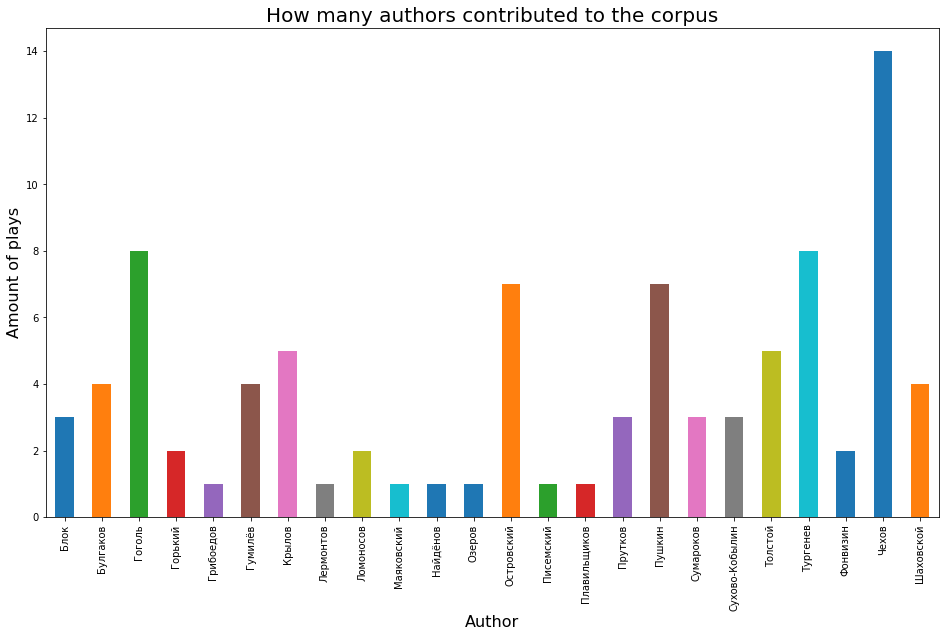

In [10]:
plt.figure(figsize=(16,9))
plt.title("How many authors contributed to the corpus", fontsize=20)
plt.xlabel("Author", fontsize=16)
plt.xticks(rotation=-90)
plt.ylabel("Amount of plays", fontsize=16)

authors.plot(kind="bar")
plt.savefig("./figures/authors.png")
plt.show()

#### By average lemmas per direction

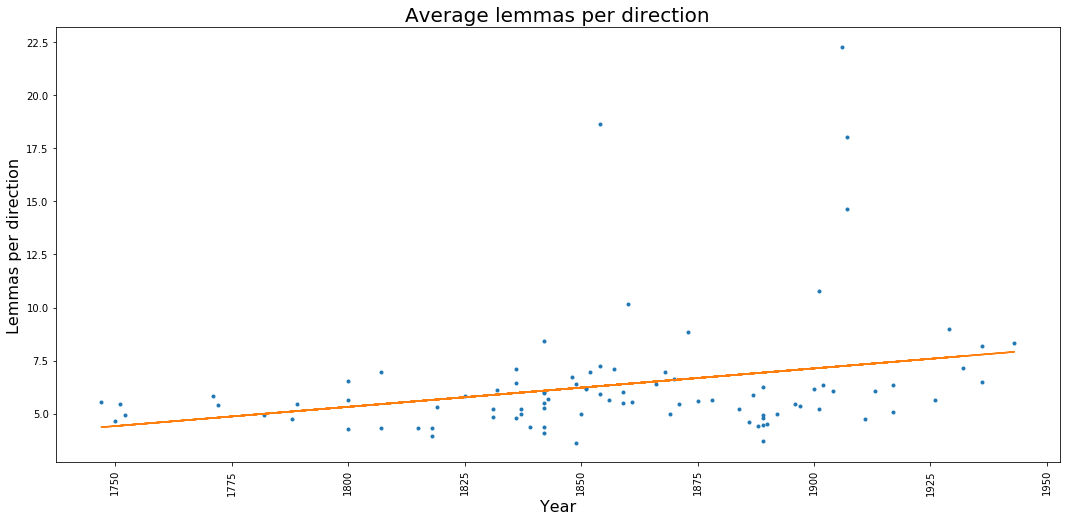

In [11]:
axis = {
    "title": "Average lemmas per direction",
    "x": "Year",
    "y": "Lemmas per direction",
    "file_name": "lemmas"
}

plot_features(play_df["Year"],  play_df["Lemmas, per direction"], axis)

## Parts-of-speech

### Average usage of parts-of-speech throughout the time

First, we're going to plot each POS usage in each play. Furthermore, we'll do a simple regression to find a general trend — `regression()` is responsible for that. 

Then, we'll plot these trends separately so that we will be able to compare them.

#### Adjectives

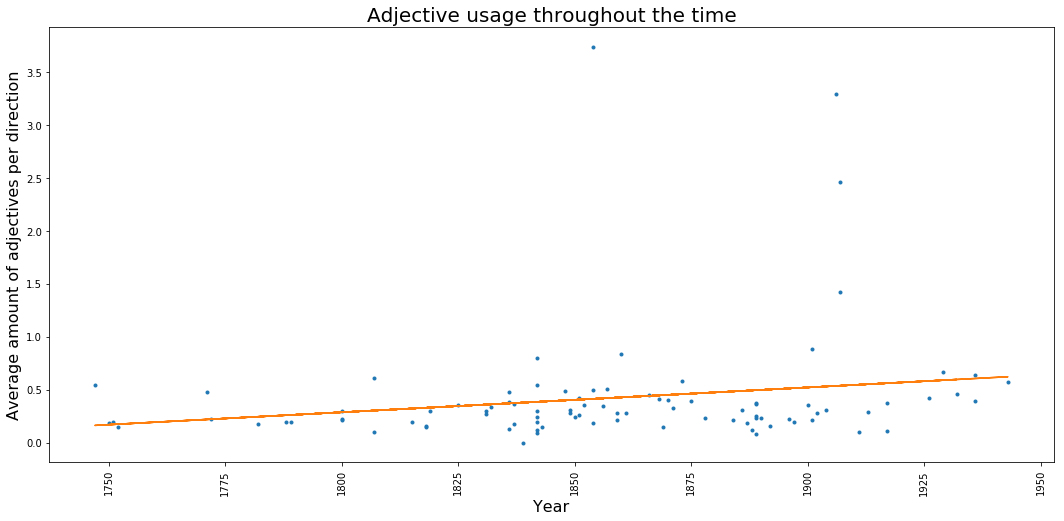

In [12]:
axis = {
    "title": "Adjective usage throughout the time",
    "x": "Year",
    "y": "Average amount of adjectives per direction",
    "file_name": "adj"
}

plot_features(play_df["Year"], play_df["ADJ"], axis)

#### Adverbs

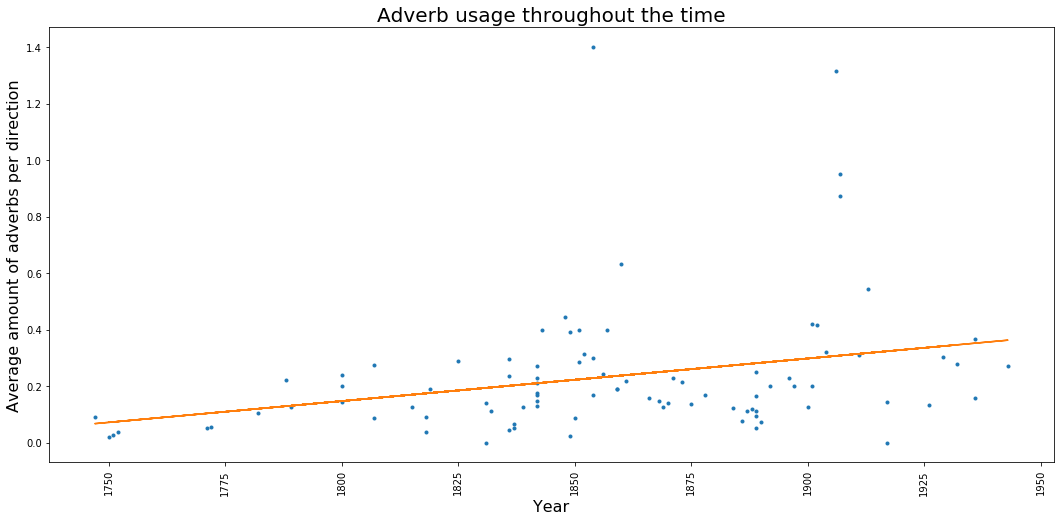

In [13]:
axis = {
    "title": "Adverb usage throughout the time",
    "x": "Year",
    "y": "Average amount of adverbs per direction",
    "file_name": "adv"
}

plot_features(play_df["Year"], play_df["ADVB"], axis)

#### Interjections

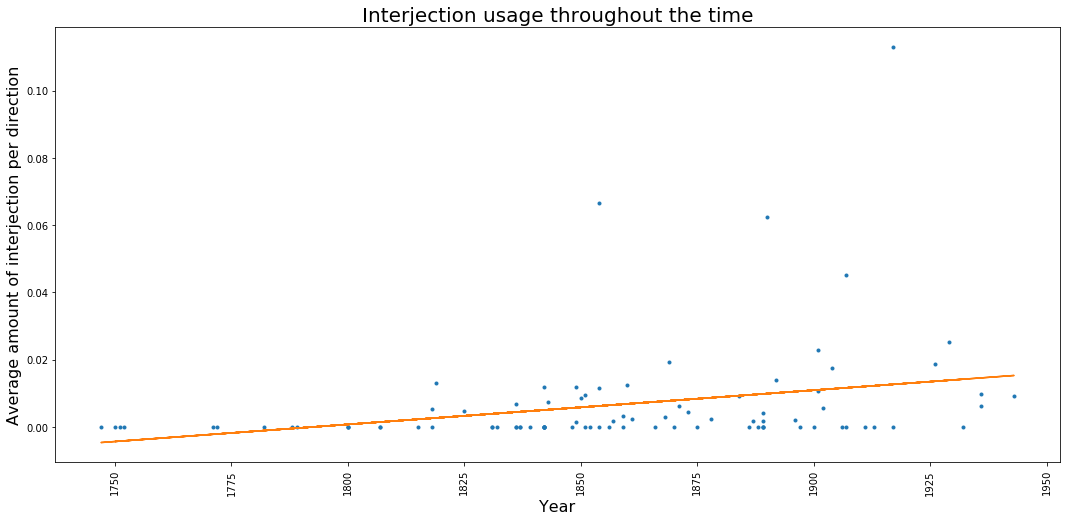

In [14]:
axis = {
    "title": "Interjection usage throughout the time",
    "x": "Year",
    "y": "Average amount of interjection per direction",
    "file_name": "intj"
}

plot_features(play_df["Year"], play_df["INTJ"], axis)

#### Verbs

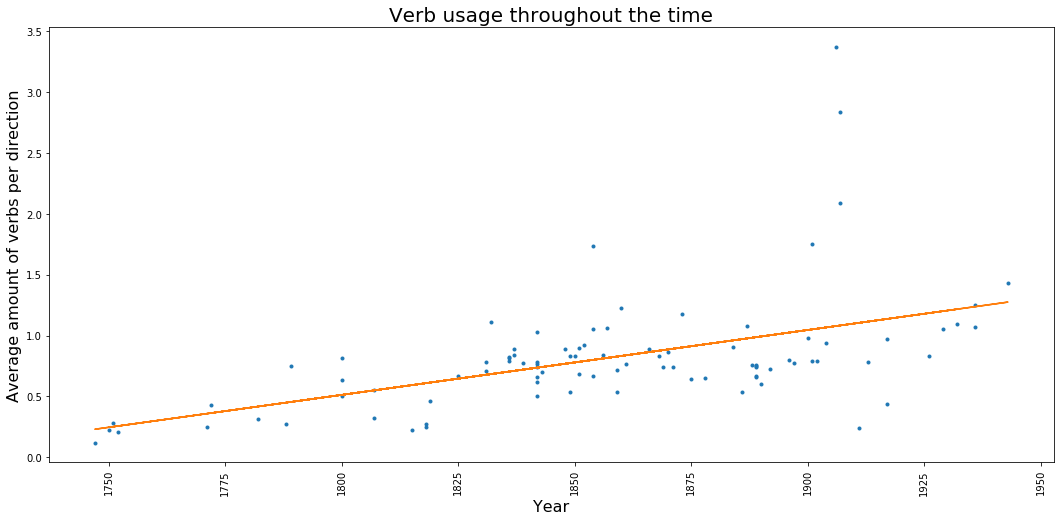

In [15]:
axis = {
    "title": "Verb usage throughout the time",
    "x": "Year",
    "y": "Average amount of verbs per direction",
    "file_name": "verb"
}

plot_features(play_df["Year"], play_df["VERB"], axis)

#### Nouns

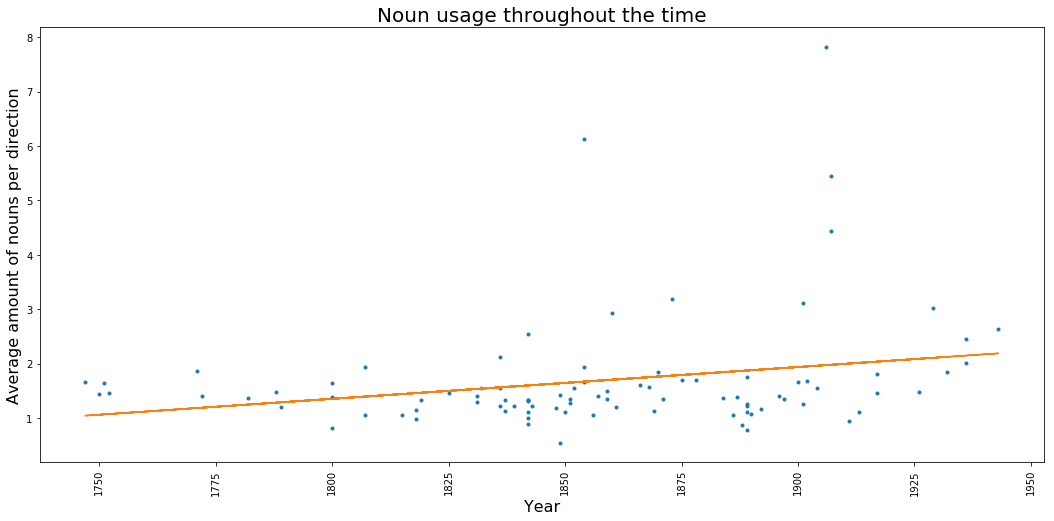

In [16]:
axis = {
    "title": "Noun usage throughout the time",
    "x": "Year",
    "y": "Average amount of nouns per direction",
    "file_name": "noun"
}

plot_features(play_df["Year"], play_df["NOUN"], axis)

#### Prepositions

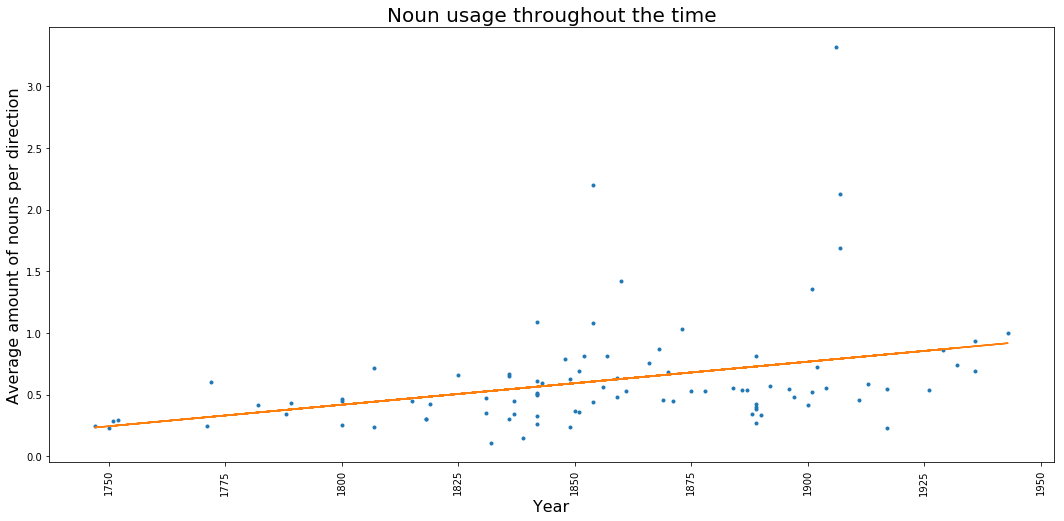

In [17]:
axis = {
    "title": "Noun usage throughout the time",
    "x": "Year",
    "y": "Average amount of nouns per direction",
    "file_name": "prep"
}

plot_features(play_df["Year"], play_df["PREP"], axis)

### Comapring POS growth throughout the time

In [18]:
adj_m, adj_b = regression(play_df["Year"], play_df["ADJ"])
advb_m, advb_b = regression(play_df["Year"], play_df["ADVB"])
intj_m, intj_b = regression(play_df["Year"], play_df["INTJ"])
verb_m, verb_b = regression(play_df["Year"], play_df["VERB"])
noun_m, noun_b = regression(play_df["Year"], play_df["NOUN"])
prep_m, prep_b = regression(play_df["Year"], play_df["PREP"])

pos_coefs = [(adj_m, adj_b, "adj"), (advb_m, advb_b, "advb"), (intj_m, intj_b, "intj"), 
    (verb_m, verb_b, "verb"), (noun_m, noun_b, "noun"), (prep_m, prep_b, "prep")]

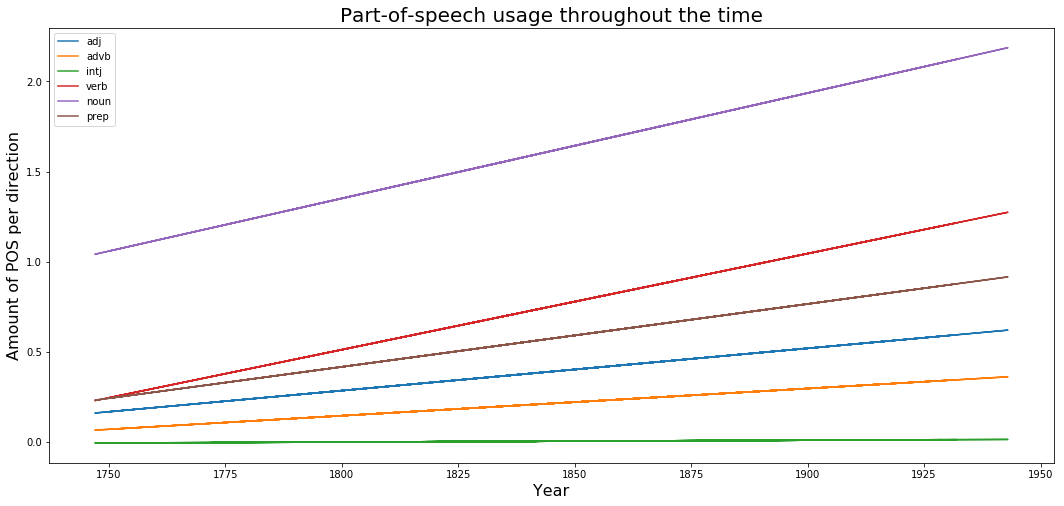

In [19]:
# plot
plt.figure(figsize=(18,8))
plt.title("Part-of-speech usage throughout the time", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Amount of POS per direction", fontsize=16)

X = play_df["Year"]
for pair in pos_coefs:
    m = pair[0]
    b = pair[1]
    pos = pair[2]
    plt.plot(X, m*X+b, label=pos)
plt.legend(loc="upper left")
plt.savefig("./figures/all_pos.png")
plt.show()